# LAB 5 - RANDOM FORESTS AND BOOSTED TREES

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [275]:
ctr = pd.read_csv("CTR.csv")
ctr.info()
ctr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CTR            6057 non-null   float64
 1   titleWords     6057 non-null   int64  
 2   adWords        6057 non-null   int64  
 3   depth          6057 non-null   int64  
 4   position       6057 non-null   int64  
 5   advCTR         6057 non-null   float64
 6   advCTRInPos    6057 non-null   float64
 7   queryCTR       6057 non-null   float64
 8   queryCTRInPos  6057 non-null   float64
 9   gender         6057 non-null   object 
 10  age            6057 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 520.6+ KB


,CTR,titleWords,adWords,depth,position,advCTR,advCTRInPos,queryCTR,queryCTRInPos,gender,age
0,0.0000,8,17,1,1,0.0136,0.0153,0.0000,0.0000,male,0-12
1,0.0000,9,19,3,3,0.0199,0.0088,0.0394,0.0125,male,25-30
2,0.0675,6,30,2,1,0.0825,0.1002,0.0200,0.0256,female,13-18
3,0.0000,5,19,3,2,0.0116,0.0090,0.0042,0.0017,female,25-30
4,0.0000,10,22,1,1,0.0186,0.0284,0.0294,0.0431,female,0-12


In [276]:
from sklearn.model_selection import train_test_split

y = ctr['CTR']
X = pd.get_dummies(ctr.drop(['CTR'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((4239, 18), (1818, 18))

## Decision Tree Regressor with CV

In [277]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

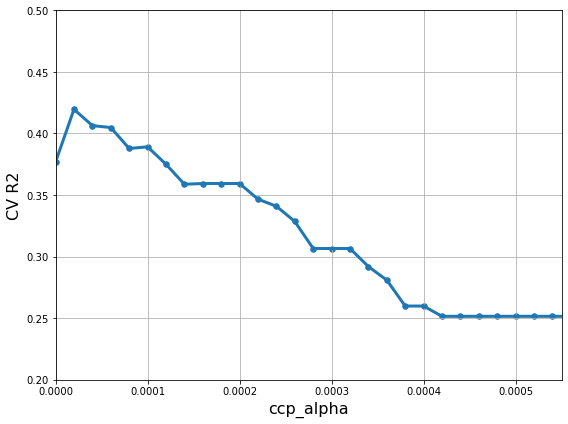

In [278]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [279]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 2e-05}


### Evaluation

In [280]:
from sklearn.metrics import r2_score

print('CV R2:', round(r2_score(y_train, dtr_cv.predict(X_train)), 5))
print('CV R2:', round(dtr_cv.best_score_, 5))

print('OSR2:', round(r2_score(y_test, dtr_cv.predict(X_test)), 5))

CV R2: 0.56181
CV R2: 0.4196
OSR2: 0.43546


## Random Forest Regressor

In [281]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.1s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [282]:
rf.verbose = False
print('R2:', round(r2_score(y_train, rf.predict(X_train)), 5))
print('OSR2:', round(r2_score(y_test, rf.predict(X_test)), 5))

R2: 0.69844
OSR2: 0.56391


## Random Forest Regressor with CV

In [283]:
import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 518.94 s


(0.3, 0.6)

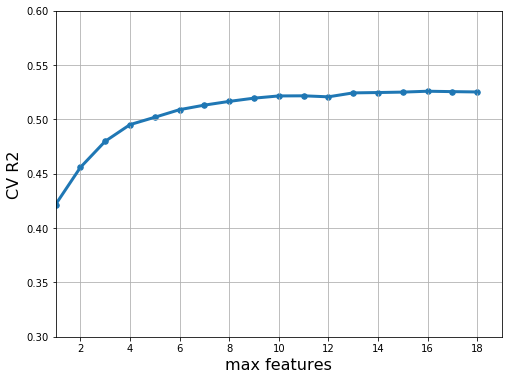

In [284]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.3, 0.6])

In [285]:
print(rf_cv.best_params_)

{'max_features': 16, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [286]:
print('CV R2:', round(r2_score(y_train, rf_cv.predict(X_train)), 5))
print('OSR2:', round(r2_score(y_test, rf_cv.predict(X_test)), 5))

CV R2: 0.75259
OSR2: 0.55551


### Feature Importance

In [287]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,titleWords,3.7
1,adWords,3.0
2,depth,1.6
3,position,0.3
4,advCTR,14.5
5,advCTRInPos,45.6
6,queryCTR,7.5
7,queryCTRInPos,21.1
8,gender_female,0.5
9,gender_male,0.4


<BarContainer object of 18 artists>

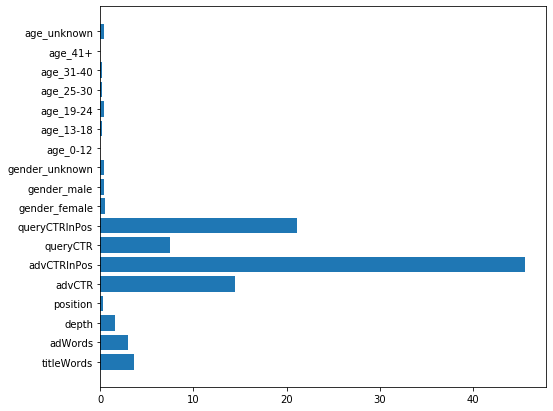

In [288]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*rf_cv.best_estimator_.feature_importances_)

## Gradient Boosting Regressor

In [289]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.001, random_state=88, verbose=1,
                                max_depth=3) #, max_leaf_nodes=8) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0060            7.99s
         2           0.0060            7.07s
         3           0.0060            6.70s
         4           0.0060            6.59s
         5           0.0060            9.02s
         6           0.0060            8.91s
         7           0.0060            8.75s
         8           0.0060            8.56s
         9           0.0060            8.38s
        10           0.0060            8.49s
        20           0.0059            8.72s
        30           0.0059            7.93s
        40           0.0058            7.97s
        50           0.0058            7.55s
        60           0.0057            7.21s
        70           0.0057            7.05s
        80           0.0056            6.85s
        90           0.0056            6.60s
       100           0.0055            6.41s
       200           0.0051            5.07s
       300           0.0048            4.28s
       40

GradientBoostingRegressor(learning_rate=0.001, n_estimators=1000,
                          random_state=88, verbose=1)

In [290]:
print('R2:', round(r2_score(y_train, gbr.predict(X_train)), 5))
print('OSR2:', round(r2_score(y_test, gbr.predict(X_test)), 5))

R2: 0.41374
OSR2: 0.42805


## Gradient Boosting Regressor with CV

### V1 (max_depth fixed)

In [291]:
grid_values = {'max_depth': [30],
               'max_leaf_nodes': np.logspace(1, 10, 10, base=2, dtype='int32'), # BEFORE: np.logspace(1, 6, 6, base=2, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': [1000],
               'learning_rate': [0.001],
               'random_state': [88]} 

tic = time.time()

gbr = GradientBoostingRegressor()
gbr_cv1 = GridSearchCV(gbr, param_grid=grid_values, scoring='r2', cv=5)
gbr_cv1.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 652.55 s


### V2 (max_leaf_nodes fixed)

In [292]:
grid_values = {'max_depth': np.linspace(1, 20, 20, dtype='int32'), # BEFORE: np.linspace(1, 10, 10, dtype='int32'),
               'max_leaf_nodes': [None],
               'min_samples_leaf': [10],
               'n_estimators': [1000],
               'learning_rate': [0.001],
               'random_state': [88]} 

tic = time.time()

gbr = GradientBoostingRegressor()
gbr_cv2 = GridSearchCV(gbr, param_grid=grid_values, scoring='r2', cv=5)
gbr_cv2.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 1518.15 s


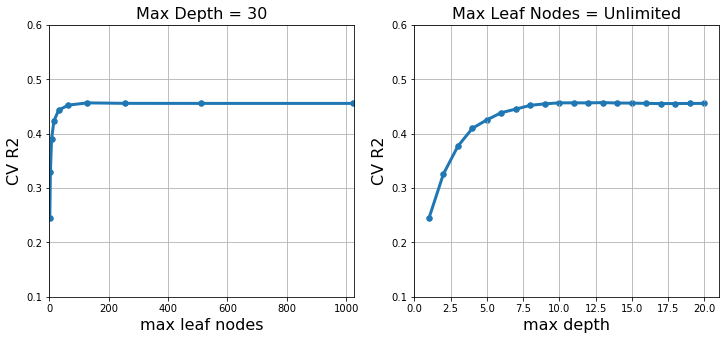

In [293]:
## V1 plot
max_leaf_nodes = gbr_cv1.cv_results_['param_max_leaf_nodes'].data
R2_scores = gbr_cv1.cv_results_['mean_test_score']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.xlabel('max leaf nodes', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_leaf_nodes, R2_scores, s=30)
plt.plot(max_leaf_nodes, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 1025])
plt.ylim([0.1, 0.6])
plt.title('Max Depth = 30', fontsize=16)

## V2 plot
max_depth = gbr_cv2.cv_results_['param_max_depth'].data
R2_scores = gbr_cv2.cv_results_['mean_test_score']

plt.subplot(1, 2, 2)
plt.xlabel('max depth', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_depth, R2_scores, s=30)
plt.plot(max_depth, R2_scores, linewidth=3)
plt.title('Max Leaf Nodes = Unlimited', fontsize=16)
plt.xlim([0, 21])
plt.ylim([0.1, 0.6])
plt.grid(True, which='both')
plt.show()

In [294]:
print(gbr_cv1.best_params_['max_leaf_nodes'], gbr_cv1.best_score_)
print(gbr_cv2.best_params_['max_depth'], gbr_cv2.best_score_)

128 0.4567423656492172
13 0.45722543963669215


### V3 (more complete grid)

In [263]:
grid_values = {'max_depth': np.linspace(2, 13, 12, dtype='int32'), # BEFORE: [3], OR NEXT 'max_leaf_nodes': np.logspace(1, 10, 10, base=2, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': np.logspace(9, 15, num=7, base=2, dtype='int32'),
                # BEFORE: np.linspace(500, 20000, 40, dtype='int32'), 
                # R used np.linspace(500, 37500, 3, dtype='int32')
                # 'n_estimators': np.linspace(500, 20000, 40, dtype='int32') took 11 hours for max_depth fixed = [3]
                # 'n_estimators': np.linspace(500, 5000, 10, dtype='int32') took 11 minutes for max_depth fixed = [3]
               'learning_rate': [0.001],
               'random_state': [88]} 

tic = time.time()

gbr = GradientBoostingRegressor()
gbr_cv3 = GridSearchCV(gbr, param_grid=grid_values, scoring='r2', cv=5)
gbr_cv3.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 114302.42 s


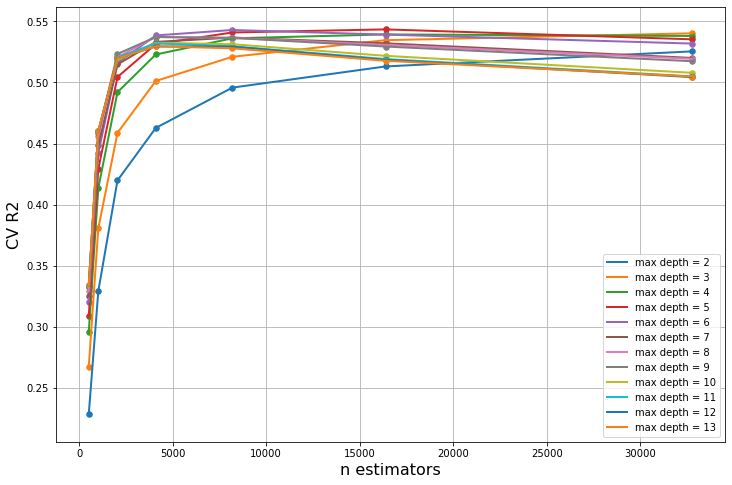

In [266]:
# max_depth = gbr_cv3.cv_results_['param_max_depth'].data
n_estimators = gbr_cv3.cv_results_['param_n_estimators'].data
R2_scores = gbr_cv3.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')
# plt.xlim([0, 20000])
# plt.ylim([0.25, 0.6])

N = len(grid_values['max_depth'])
M = len(grid_values['n_estimators'])

for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='max depth = '+str(grid_values['max_depth'][i]))
plt.legend(loc='lower right')
plt.show()

In [267]:
print(gbr_cv3.best_params_)

{'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 16384, 'random_state': 88}


In [268]:
print('CV R2:', round(r2_score(y_train, gbr_cv3.predict(X_train)), 5))
print('OSR2:', round(r2_score(y_test, gbr_cv3.predict(X_test)), 5))

CV R2: 0.78761
OSR2: 0.54204


In [269]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*gbr_cv3.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,titleWords,2.7
1,adWords,2.7
2,depth,2.3
3,position,0.4
4,advCTR,13.1
5,advCTRInPos,49.3
6,queryCTR,6.7
7,queryCTRInPos,21.1
8,gender_female,0.5
9,gender_male,0.1


<BarContainer object of 18 artists>

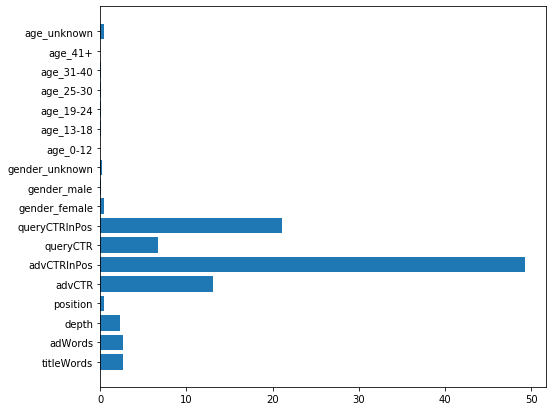

In [270]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*gbr_cv3.best_estimator_.feature_importances_)

## Final Comparison

In [271]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Linear Regression Baseline

In [272]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [273]:
# print('Linear Regression OSR2:', round(r2_score(y_test, lr.predict(X_test)), 5))
# print('CART OSR2:', round(r2_score(y_test, dtr_cv.predict(X_test)), 5))
# print('Random Forest OSR2:', round(r2_score(y_test, rf_cv.predict(X_test)), 5))
# print('Gradient Boosted Trees OSR2:', round(r2_score(y_test, gbr_cv3.predict(X_test)), 5))

# print('\nLinear Regression Out-of-sample MSE:', round(mean_squared_error(y_test, lr.predict(X_test)), 5))
# print('Decision Tree Regressor Out-of-sample MSE:', round(mean_squared_error(y_test, dtr_cv.predict(X_test)), 5))
# print('Random Forest Out-of-sample MSE:', round(mean_squared_error(y_test, rf_cv.predict(X_test)), 5))
# print('Gradient Boosted Trees Out-of-sample MSE:', round(mean_squared_error(y_test, gbr_cv3.predict(X_test)), 5))

# print('\nLinear Regression Out-of-sample MAE:', round(mean_absolute_error(y_test, lr.predict(X_test)), 5))
# print('Decision Tree Regressor Out-of-sample MAE:', round(mean_absolute_error(y_test, dtr_cv.predict(X_test)), 5))
# print('Random Forest Out-of-sample MAE:', round(mean_absolute_error(y_test, rf_cv.predict(X_test)), 5))
# print('Gradient Boosted Trees Out-of-sample MAE:', round(mean_absolute_error(y_test, gbr_cv3.predict(X_test)), 5))

comparison_data = {'Linear Regression': ['{:.3f}'.format(r2_score(y_test, lr.predict(X_test))),
                                         '{:.4f}'.format(mean_squared_error(y_test, lr.predict(X_test))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, lr.predict(X_test)))],
                   'Decision Tree Regressor': ['{:.3f}'.format(r2_score(y_test, dtr_cv.predict(X_test))),
                                               '{:.4f}'.format(mean_squared_error(y_test, dtr_cv.predict(X_test))),
                                               '{:.3f}'.format(mean_absolute_error(y_test, dtr_cv.predict(X_test)))],
                   'Random Forest': ['{:.3f}'.format(r2_score(y_test, rf_cv.predict(X_test))),
                                     '{:.4f}'.format(mean_squared_error(y_test, rf_cv.predict(X_test))),
                                     '{:.3f}'.format(mean_absolute_error(y_test, rf_cv.predict(X_test)))], 
                   'Gradient Boosted Trees': ['{:.3f}'.format(r2_score(y_test, gbr_cv3.predict(X_test))),
                                              '{:.4f}'.format(mean_squared_error(y_test, gbr_cv3.predict(X_test))),
                                              '{:.3f}'.format(mean_absolute_error(y_test, gbr_cv3.predict(X_test)))]}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample MSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Linear Regression,Decision Tree Regressor,Random Forest,Gradient Boosted Trees
OSR2,0.487,0.435,0.556,0.542
Out-of-sample MSE,0.0028,0.0030,0.0024,0.0025
Out-of-sample MAE,0.032,0.033,0.029,0.029


In [ ]:
# # for boosting/rf let's look at MAE restricted to CTR above and below 10%
# test.ctr.above <- filter(test.ctr, CTR > .1)
# test.ctr.below <- filter(test.ctr, CTR <= .1)
# test.ctr.above.mm = as.data.frame(model.matrix(CTR ~ . + 0, data=test.ctr.above))
# test.ctr.below.mm = as.data.frame(model.matrix(CTR ~ . + 0, data=test.ctr.below))

# nrow(test.ctr.below)
# nrow(test.ctr.above)

# pred.boost.above <- predict(best.boost, newdata = test.ctr.above.mm, n.trees = 11500)
# pred.boost.below <- predict(best.boost, newdata = test.ctr.below.mm, n.trees = 11500)

# pred.rf.above <- predict(best.rf, newdata = test.ctr.above.mm)
# pred.rf.below <- predict(best.rf, newdata = test.ctr.below.mm)

# print("Boosting Out-of-sample MAE for CTR above 10%:")
# sum(abs(test.ctr.above$CTR - pred.boost.above))/nrow(test.ctr.above)
# print("Boosting Out-of-sample MAE for CTR below 10%:")
# sum(abs(test.ctr.below$CTR - pred.boost.below))/nrow(test.ctr.below)

# print("RF Out-of-sample MAE for CTR above 10%:")
# sum(abs(test.ctr.above$CTR - pred.rf.above))/nrow(test.ctr.above)
# print("RF Out-of-sample MAE for CTR below 10%:")
# sum(abs(test.ctr.below$CTR - pred.rf.below))/nrow(test.ctr.below)

## -------------------------------------------------------------------------------------------------------

## EXTRA

In [ ]:
# np.random.seed(66)

# train_idx = np.random.choice(len(ctr), size=int(len(ctr)*0.7), replace=False)
# ctr_train = ctr.iloc[train_idx]
# ctr_test = ctr.drop(index=train_idx)

# ctr_test.shape

In [ ]:
# def R2_calculation(y_true, y_pred):
#     SSE = np.sum((y_true - y_pred)**2)
#     SST = np.sum((y_true - np.mean(y_train))**2)    
#     return  1 - SSE/SST

In [ ]:
# ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
# MSE_scores = dtr_cv.cv_results_['mean_test_neg_mean_squared_error']*(-1) # sklearn uses the negative of the loss as an objective function to maximize, rather than implementation a minimization scheme
# R2_scores = dtr_cv.cv_results_['mean_test_r2']

# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.xlabel('ccp_alpha', fontsize=16)
# plt.ylabel('CV R-squared', fontsize=16)
# plt.scatter(ccp_alpha, R2_scores, s=30)
# plt.plot(ccp_alpha, R2_scores, linewidth=3)
# plt.grid(True, which='both')
# plt.xlim([0, 0.00055])
# plt.ylim([0.2, 0.5])

# plt.subplot(1, 2, 2)
# plt.xlabel('ccp_alpha', fontsize=16)
# plt.ylabel('Mean Squared Error', fontsize=16)
# plt.scatter(ccp_alpha, MSE_scores, s=30)
# plt.plot(ccp_alpha, MSE_scores, linewidth=3)
# plt.grid(True, which='both')
# plt.xlim([0, 0.00055])
# plt.ylim([0.0025, 0.005])

# plt.tight_layout()
# plt.show()

In [ ]:
# grid_values = {'max_depth': [3, 4],
#                'min_samples_leaf': [10],
#                'n_estimators': np.linspace(500, 1000, 2, dtype='int32'),
#                'learning_rate': [0.001],
#                'random_state': [88]} 
# gbr2 = GradientBoostingRegressor()
# gbr_cv4 = GridSearchCV(gbr2, param_grid=grid_values, scoring='r2', cv=5)
# gbr_cv4.fit(X_train, y_train)
# gbr_cv4.cv_results_

# max_depth = [1, 1, 2, 2, 3, 3]
# N = len(grid_values['max_depth'])
# N = 3

# n_estimators = [500, 1000, 1500, 500, 1000, 1500, 500, 1000, 1500]
# M = len(grid_values['n_estimators'])
# M = 3

# for i in range(N):
#     print(n_estimators[(M*i):(M*i)+M])

# # max_depth = gbr_cv4.cv_results_['param_max_depth'].data
# n_estimators = gbr_cv4.cv_results_['param_n_estimators'].data
# R2_scores = rf_cv.cv_results_['mean_test_score']

# plt.figure(figsize=(8, 6))
# plt.xlabel('n estimators', fontsize=16)
# plt.ylabel('CV R2', fontsize=16)
# plt.grid(True, which='both')
# plt.xlim([0, 20000])
# plt.ylim([0.2, 0.6])

# N = len(grid_values['max_depth'])
# M = len(grid_values['n_estimators'])

# for i in range(N):
#     plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
#     plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=3,
#              label='max depth = '+str(grid_values['max_depth'][i]))
# plt.legend(loc='lower right')
# plt.show()